In [1]:
from transformers import DistilBertForSequenceClassification, DistilBertTokenizerFast, Trainer, TrainingArguments
from datasets import load_dataset
import torch


from sklearn.metrics import precision_recall_fscore_support, accuracy_score, confusion_matrix
import numpy as np

def compute_metrics(eval_pred):
    logits, labels = eval_pred
    preds = np.argmax(logits, axis=1)

    precision, recall, f1, _ = precision_recall_fscore_support(labels, preds, average="binary")
    acc = accuracy_score(labels, preds)
    cm = confusion_matrix(labels, preds)

    return {
        "accuracy": acc,
        "precision": precision,
        "recall": recall,
        "f1": f1,
        "confusion_matrix": cm.tolist()  
    }


# Load model and tokenizer
model = DistilBertForSequenceClassification.from_pretrained("./models/distilbert-amazon-sentiment")
tokenizer = DistilBertTokenizerFast.from_pretrained("./models/distilbert-amazon-sentiment")

# Load dataset
dataset = load_dataset("amazon_polarity")

# Make a randomly sampled dataset for test
dataset = dataset.shuffle(seed=50)
test  = dataset["test"].select(range(1000))

test_enc = test.map(lambda e: tokenizer(e["content"], truncation=True, padding="max_length"), batched=True)
test_enc.set_format(type="torch", columns=["input_ids", "attention_mask", "label"])

args = TrainingArguments(
    output_dir="./results",
    report_to="none" 
)


# Evaluate
trainer = Trainer(model=model, args=args, compute_metrics=compute_metrics)

metrics = trainer.evaluate(test_enc)

In [2]:
print(metrics)

{'eval_loss': 0.20707878470420837, 'eval_model_preparation_time': 0.002, 'eval_accuracy': 0.926, 'eval_precision': 0.8979963570127505, 'eval_recall': 0.9647749510763209, 'eval_f1': 0.930188679245283, 'eval_confusion_matrix': [[433, 56], [18, 493]], 'eval_runtime': 16.5318, 'eval_samples_per_second': 60.49, 'eval_steps_per_second': 7.561}


[[433  56]
 [ 18 493]]


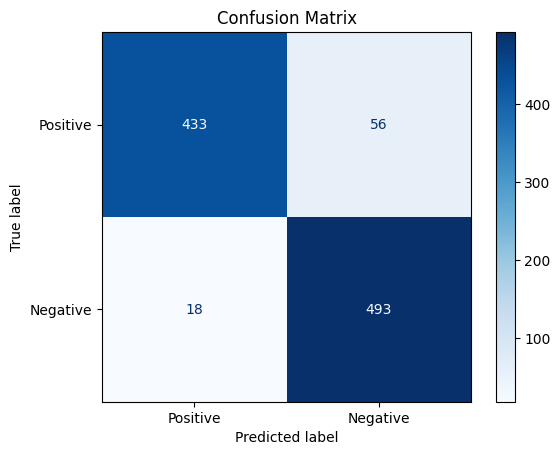

In [3]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

cm = metrics["eval_confusion_matrix"]

CM = np.array([[cm[0][0], cm[0][1]],[cm[1][0], cm[1][1]]])

print(CM)


disp = ConfusionMatrixDisplay(confusion_matrix=CM, display_labels=['Positive', 'Negative'])
disp.plot(cmap=plt.cm.Blues)
plt.title('Confusion Matrix')
plt.show()


In [4]:
print("Accuracy = {}".format(metrics["eval_accuracy"]))
print("Precission = {}".format(metrics["eval_accuracy"]))
print("Recall = {}".format(metrics["eval_accuracy"]))
print("F1 = {}".format(metrics["eval_accuracy"]))

Accuracy = 0.926
Precission = 0.926
Recall = 0.926
F1 = 0.926
